# MNIST
Scikit-learn provides many helper funcitons to download popular datasets. MNIST is one of them.

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

Datasets loaded by Scikit-Learn generally have similar dictionary structure including:
- A **DESCR** key describing the dataset.
- A **data** key containing the an array with one row per instance and one column per feature
- A **target** key containing an array with the label

In [2]:
X, y = mnist['data'], mnist.target
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

There are 70000 images, and each image has 784 features. This is because each image is 28\*28 pixels, and each feature simply represents one pixel's intensity, from 0(white) to 255(black).

Now let's take a peek at one digit from the dataset.

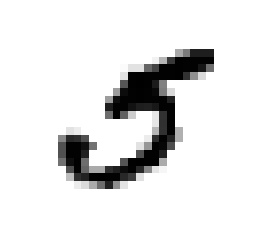

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually already split into a training set(the first 60000 images) and a test set(the last 10000 images).

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

**Shuffle the training set now. **

This will guarantee that all cross-validation folds will be similar. Moreover, some learning algorithms are sensitive to the order tof the training instances, and they perform poorly if they get many similar instances in a row. 

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier
Let's simplify the problem for now and only try to identify one digit - for example, the number 5. This will be an example of a *binary classifier*, capable of distinguishing between just 2 classes, 5 or not-5.

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

In [9]:
y_train_5[:5]

array([False, False, False, False, False])

Now let's pick a classifier and train it. A good place to start is with a **Stochastic Gradient Descent(SGD)** classifier, using **SGDClassifier** class. 

**This classifier has the advantage of being capabel of handling very large datasets efficiently.** This is in part because SGD deals with training instances independently, one at a time(which makes SGD well suited for online learning).

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

It seems that SGD is wrong this time. But it's ok.
# Performance Measure
Evaluating a classifier is often significantly trickier than evaluating a regressor.

## Measuring Accuracy Using Cross-validation
Let's use the `cross_val_score()` function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds.

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([0.96585, 0.9636 , 0.9668 ])

Wow! Above 96% accuracy(ratio of correct predictions) on all cv folds. 

Well, before you get too excited, let's look at a very dumb classifier that just classifies every single image in the "not-5" class:

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9126 , 0.9085 , 0.90785])

So if we always guess that the image is not a 5, we will be right about 90% of the time.

This demonstrates why accuracy is generally not preferred performance measure for calssifers, especially when you are dealing with *skewed datasets*(i.e., when some classes are much more frequent than others)

## Confusion Matrix
The general idea of confusion matrix is to count the number of times instances of class A are classified as class B.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You can make predictions on the test set, but let's it untouched for now.

In [15]:
from sklearn.model_selection import  cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53974,   605],
       [ 1470,  3951]], dtype=int64)

**Each row in a confusion matrix represents an actual class, while each column represent a predicted class.**

The first row of this matrix considers non-5 images(the negative class):53903 of them were classified as non-5s(**true negatives**), while the remaining 1307 were classified as 5s(**false positives**). Same in 2nd row: **false negatives and true positives**.

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal.(主对角线）

In [17]:
confusion_matrix(y_train_5 , y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric.

**precision** of thie classifier is the accuracy of the positive predicitons.$$precision = \frac{TP}{TP+FP}$$

precision is typically used along with another metric named **recall**, also called **sensitivity** or **true positive rate(TPR)**: this is ratio of positive instances that are correctly detected by the classifier. $$recall=\frac{TP}{TP+FN}$$

## Precision and Recall

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.867208077260755

In [19]:
recall_score(y_train_5, y_train_pred)

0.7288323187603764

So now the detector does not look as shiny as it did when you looked at its accuracy. 

It is often convenient to combine precision and recll into a single metric called the **F1 score**, in particular if you need a simple way to compare two classifiers. The classifier will only get a high F1 score if both recall and precision are high.
$$F_1 = \frac{2*precision*recall}{precision+recall}$$

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7920216497945275

The F1-score favors classifiers that have similar precision and recall. But you can't have it both ways:increasing precision reduces recall, and vice versa.This is called **precision/recall tradeoff**.

## Precision/Recall Tradeoff
To understand this tradeoff, let's look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a *decision function*, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.

So how can you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the `cross_val_predict()` function again, but this time specifying that you want it to return decision scores instead of predictions:

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([ -847419.34615317, -1114850.27864536,  -365963.31900876, ...,
        -614100.7112745 ,   106258.79300163,  -367891.07839075])

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [23]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

<function matplotlib.pyplot.show>

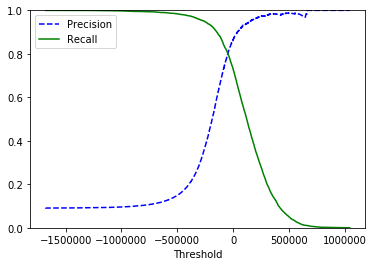

In [24]:
plot_precision_recall_vs_thresholds(precisions, recalls,thresholds)
plt.show

Now you can simply select the threshold value that gives you the best precision/recall tradeoff for your task.

Another way to select a good precision/recall tradeoff if to plot precision directly against recall.See below.

Text(0.5,1,'Precision versus recall')

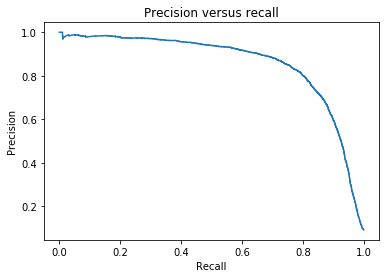

In [25]:
plt.plot(recalls, precisions)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision versus recall')

You can see that precision really starts to fall sharply around 70% recall. You may want to select a precision/recall tradeoff just before that drop.

Suppose you decide to aim for 90% precision. We could look up the first figure and find that the corresponding throshold is around 250000. To make predictions(on the training set for now), instead of calling the classifier's `predict()` method, you can just run this code: 

In [26]:
y_train_pred_90 = (y_scores > 250000)

In [27]:
precision_score(y_train_5, y_train_pred_90)

0.9717586649550706

In [28]:
recall_score(y_train_5, y_train_pred_90)

0.2792842648957757

As you can see, it is fairly easy to create a classifier with virtually any precision you want: **Just set a high enough threshold**. A high-precision classifier is not very useful if its recall is too low.

## The ROC Curve
The **receiver operating characteristic(ROC)** curve is another common tool used with binary classifiers. Instead of plotting precision versus recall, the ROC curve plots the **true positive rate(recall)** against the **false positive rate**. False positive rate is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the **true negative rate**, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called **specificity**. 

Hence the ROC curve plots sensitivity(recall) versus 1-specificity.

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.xlabel('True Positive Rate')

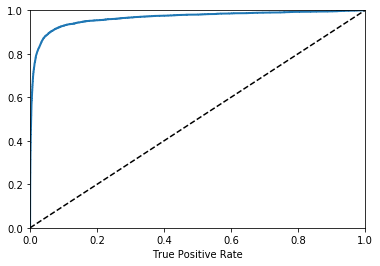

In [31]:
plot_roc_curve(fpr, tpr)
plt.show()

Once again, there is a tradeoff:**the higher the recall(TPR), the more false positives(FPR)**. The dotted line represents the ROC curve of a purely rendom classifier; a good classifier stays as far away from that line as possible(toward the top-left corner).

One way to compare classifiers is to measure the **area under the curve(AUC)**. A perfect classifier will have a ROC AUC equal to 1.

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9652703377129762

Since the ROC curve is so similar to the precision/recall(or PR) curve, you may wonder how to decide which one to use.**As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise.**

Now let's train `RandomForestClassifier` and compare its ROC curve and ROC AUC scre to the `SGDClassifier`.

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

The `predict_proba()` method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class.

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positve class's probability as the socre:

In [38]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

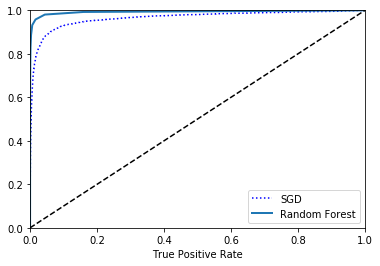

In [40]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [41]:
roc_auc_score(y_train_5, y_scores_forest)

0.9930249949100585

As you can see, the `RandomForestClassifier` ROC curve looks much better than the `SGDClassifier`'s. As a result, its ROC AUC score is also significantly better.

# Multiclass Classification
Some algorithms(such as Random Forest or naive Bayes) are capable of handling multiple classes directly. Others(such as SVM or Linear classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers:
- **One-versus-all**: Train n binary classifiers, one for each category. Then you get the decision score from each classifier for one item and you select the class whose classifier outputs the highest score.
- **One-versus-one**: Train a binary classifier for every pair of categories. The main advantage is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms(like SVM) scale poorly with the size of training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets. For most binary classificaition algorithms, however, OvA is preferred.

In scikit-learn it automatically runs OvA while OvO for SVM. 

In [42]:
sgd_clf.fit(X_train, y_train)

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [43]:
sgd_clf.predict([some_digit])

array([5.])

In [44]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -12054.57793876, -600288.60734673, -398755.65168922,
         -47748.42255455, -406279.6618411 ,   18383.70084624,
        -604865.80244848, -247198.89520503, -797978.97531277,
        -807707.32034393]])

In [45]:
np.argmax(some_digit_scores)

5

In [46]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [47]:
sgd_clf.classes_[5]

5.0

When a classifier is trained, it stores the list of target classes in tis `class_` attribute, ordered by value.

If you want to force scikit learn to use one-versus-one or one-versus-all, you can use the `OneVsOneClassifier` or `OneVsRestClassifier` classes. Simply create an instanc and  pass a binary classifier to its constructor.

In [48]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([3.])

In [49]:
len(ovo_clf.estimators_)

45

Training a `RandomForestClassifier` is just as easy:

In [50]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [51]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0.9, 0. , 0. , 0. , 0. ]])

This time scikit-learn did not have to run OvA or OvO because Random Forest classifiers can directly classify instances into multiple classes.

Noe evaluate the `SGDClassifier`'s accuracy using the `cross_val_score()` function:

In [52]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([0.86887622, 0.86064303, 0.83252488])

It gets over 84% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but we can still do it better. For example, simply scaling the inputs in creases accuracy above 90%:

In [54]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\thomas\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." %

array([0.91131774, 0.91239562, 0.90993649])

In [60]:
np.max(X_train)

255

In [63]:
np.min(X_train)

0

In [64]:
np.min(X_train_scaled)

-1.274207892082229

In [65]:
np.max(X_train_scaled)

244.94693302869513

## Error Analysis
Assume that you have found a promising 